# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#observations. Very little correlation to none in both the southern and northern hemispheres for cloudiness versus latitide
#Also, very little to no correlation for wind speed vs latitude in both southern and northern hemispheres
#Also, very little to no correlation for humidity vs latitude in both southern and northern hemispheres
#Finally there is a negatibe correlation to latitude versus max temp for the northern hemisphere and a postive correlation for the southern hemisphere

In [1]:
! pip install citipy

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import pprint
from scipy.stats import linregress

from citipy import citipy
# Import API key
from api_keys import weather_api_key

In [2]:
city_csv = "../output_data/cities.csv"


In [3]:
range_lat = (-90,90)
range_long = (-180,180)



## Generate Cities List

In [4]:
lat_long = []
cities = []

random_lat = np.random.uniform(range_lat[0], range_lat[1], size = 1500)
random_long = np.random.uniform(range_long[0], range_long[1], size = 1500)
lat_long = zip(random_lat, random_long)

for ll in lat_long:
    city = citipy.nearest_city(ll[0],ll[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)


607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}&q="
#api.openweathermap.org/data/2.5/weather?units=Imperial&appid=210a8a466757d9a9c5572d33af74f956&q=london
#210a8a466757d9a9c5572d33af74f956
city_data = []
record_counter = 1
set_counter = 1
for i,city in enumerate(cities):
    if (i%50 == 0 and i >= 50):
        set_counter += 1 
        record_counter = 0
    city_url = url + city
    print("processing record" + str(record_counter) + "of Set" + str(set_counter) + "|" + city)
    record_counter += 1
    try:
        city_weather_data = requests.get(city_url).json()
        latitude = city_weather_data['coord']['lat']
        longitude = city_weather_data['coord']['lon']
        max_temp = city_weather_data['main']['temp_max']
        humidity = city_weather_data['main']['humidity']
        cloudiness = city_weather_data['clouds']['all']
        wind_speed = city_weather_data['wind']['speed']
        country = city_weather_data['sys']['country']
        date = city_weather_data['dt']
        city_data.append({
            "City": city,
            "Latitude": latitude,
            "Longitude": longitude,
            "Max Temp": max_temp,
            "Humidity": humidity,
            "Cloudiness": cloudiness,
            "Wind Speed": wind_speed,
            "Country": country,
            "Date": date
        })
    except:
        print("City not found. Skipping...")
        pass
    #break
#pprint.pprint(city_weather_data)
#print(latitude)   

processing record1of Set1|east london
processing record2of Set1|hermanus
processing record3of Set1|cockburn town
processing record4of Set1|nouadhibou
processing record5of Set1|avarua
processing record6of Set1|trapani
processing record7of Set1|iralaya
processing record8of Set1|punta arenas
processing record9of Set1|taolanaro
City not found. Skipping...
processing record10of Set1|kavaratti
processing record11of Set1|mataura
processing record12of Set1|kysyl-syr
processing record13of Set1|kamenka
processing record14of Set1|rikitea
processing record15of Set1|sitka
processing record16of Set1|dikson
processing record17of Set1|maniitsoq
processing record18of Set1|bluff
City not found. Skipping...
processing record19of Set1|jamestown
processing record20of Set1|effingham
processing record21of Set1|fairbanks
processing record22of Set1|sola
processing record23of Set1|illoqqortoormiut
City not found. Skipping...
processing record24of Set1|belushya guba
City not found. Skipping...
processing record2

processing record12of Set5|karakendzha
City not found. Skipping...
processing record13of Set5|hurghada
processing record14of Set5|shaunavon
processing record15of Set5|melilla
processing record16of Set5|zhangye
processing record17of Set5|naze
processing record18of Set5|wajima
processing record19of Set5|himora
City not found. Skipping...
processing record20of Set5|haines junction
processing record21of Set5|leningradskiy
processing record22of Set5|deqing
processing record23of Set5|wakkanai
processing record24of Set5|mys shmidta
City not found. Skipping...
processing record25of Set5|thunder bay
processing record26of Set5|touros
processing record27of Set5|arrah
processing record28of Set5|bambous virieux
processing record29of Set5|kahului
processing record30of Set5|ugoofaaru
processing record31of Set5|pemangkat
processing record32of Set5|amderma
City not found. Skipping...
processing record33of Set5|isiro
processing record34of Set5|baghmara
processing record35of Set5|longyearbyen
processing 

processing record24of Set9|sinnamary
processing record25of Set9|cavalcante
processing record26of Set9|kargopol
processing record27of Set9|metro
processing record28of Set9|zuwarah
processing record29of Set9|kawalu
processing record30of Set9|manicore
processing record31of Set9|panaba
processing record32of Set9|ola
processing record33of Set9|nikolskoye
processing record34of Set9|babanusah
City not found. Skipping...
processing record35of Set9|ayan
processing record36of Set9|quatre cocos
processing record37of Set9|kemijarvi
processing record38of Set9|eureka
processing record39of Set9|port keats
processing record40of Set9|sharkan
processing record41of Set9|san rafael
processing record42of Set9|balikpapan
processing record43of Set9|mayo
processing record44of Set9|ayagoz
processing record45of Set9|coolum beach
processing record46of Set9|bilma
processing record47of Set9|nueva granada
processing record48of Set9|inverell
processing record49of Set9|zlocieniec
processing record0of Set10|maghama
Ci

In [6]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,67.75,71,99,13.22,ZA,1611539396
1,hermanus,-34.4187,19.2345,64.99,77,8,8.01,ZA,1611539407
2,cockburn town,21.4612,-71.1419,75.97,77,18,17.43,TC,1611539410
3,nouadhibou,20.9310,-17.0347,64.40,77,0,16.11,MR,1611539411
4,avarua,-21.2078,-159.7750,86.00,62,20,13.80,CK,1611539413


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_data_df.to_csv("output_city_data.csv")

In [8]:
city_data_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,67.75,71,99,13.22,ZA,1611539396
1,hermanus,-34.4187,19.2345,64.99,77,8,8.01,ZA,1611539407
2,cockburn town,21.4612,-71.1419,75.97,77,18,17.43,TC,1611539410
3,nouadhibou,20.9310,-17.0347,64.40,77,0,16.11,MR,1611539411
4,avarua,-21.2078,-159.7750,86.00,62,20,13.80,CK,1611539413
...,...,...,...,...,...,...,...,...,...
551,macusani,-14.0833,-70.4333,34.18,90,90,3.13,PE,1611540137
552,magistralnyy,56.1725,107.4458,-12.12,87,100,1.72,RU,1611540137
553,arkhipo-osipovka,44.3700,38.5200,48.61,74,72,13.42,RU,1611540138
554,thinadhoo,0.5333,72.9333,81.72,71,100,4.59,MV,1611540000


In [9]:
city_data_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.00000,556.000000,556.000000,556.000000,5.560000e+02
mean,21.874971,22.234759,46.59446,75.192446,55.091727,7.735773,1.611540e+09
std,32.914330,88.817732,34.14371,18.409281,40.593487,5.489374,1.800891e+02
min,-54.800000,-175.200000,-56.02000,11.000000,0.000000,0.310000,1.611539e+09
25%,-6.045850,-58.646725,28.30000,67.000000,8.750000,3.440000,1.611540e+09
50%,27.713450,27.523300,57.12000,78.000000,69.500000,6.465000,1.611540e+09
75%,49.271675,102.171725,73.99000,88.000000,96.000000,10.570000,1.611540e+09
max,78.218600,179.316700,106.00000,100.000000,100.000000,32.210000,1.611540e+09


In [15]:
northern_hemp_df = city_data_df.loc[(city_data_df["Latitude"]>=0)]
southern_hemp_df =  city_data_df.loc[(city_data_df["Latitude"]<=0)]

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.
#No cities greater than 100% humidity thus skipped this step per directions. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

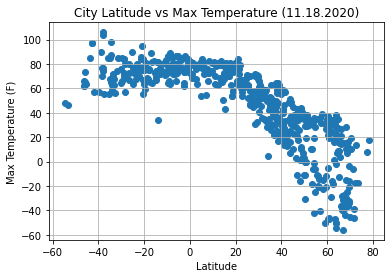

In [16]:
plt.scatter(city_data_df['Latitude'], city_data_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (11.18.2020)")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

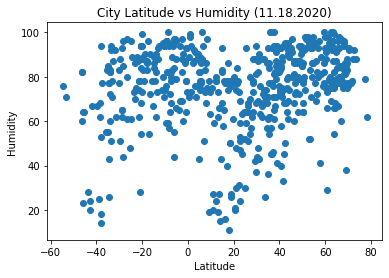

In [22]:
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity (11.18.2020)")
plt.show()

## Latitude vs. Cloudiness Plot

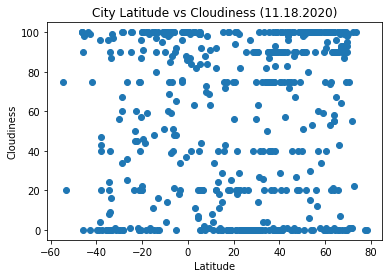

In [23]:
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness (11.18.2020)")
plt.show()

## Latitude vs. Wind Speed Plot

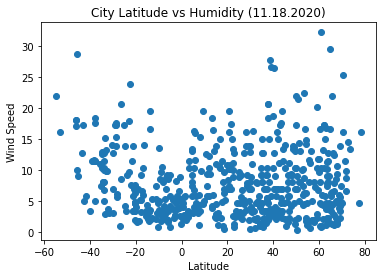

In [27]:
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Humidity (11.18.2020)")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [55]:
#Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [56]:
northern_hemp_df = city_data_df.loc[(city_data_df["Latitude"]>=0)]
southern_hemp_df =  city_data_df.loc[(city_data_df["Latitude"]<=0)]

The r-value is: 0.686471735462615


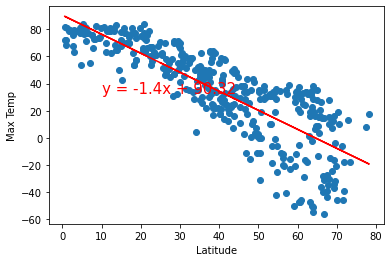

In [57]:
x_values = northern_hemp_df["Latitude"]
y_values = northern_hemp_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(10,33))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.04635929191253912


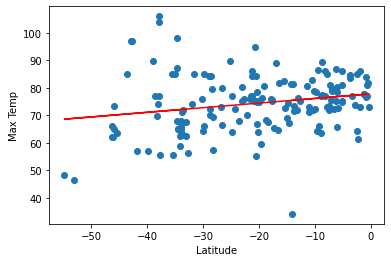

In [46]:
x_values = southern_hemp_df["Latitude"]
y_values = southern_hemp_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-65,90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08930485211411225


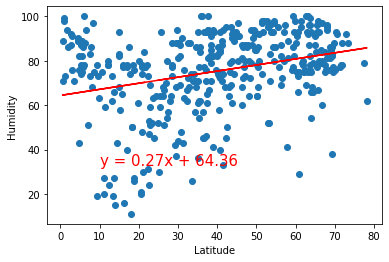

In [47]:
x_values = northern_hemp_df["Latitude"]
y_values = northern_hemp_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(10,33))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14643145866708573


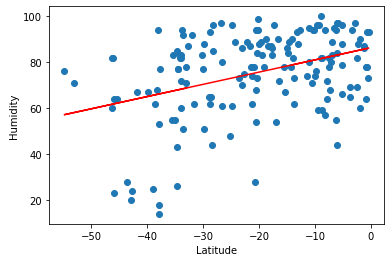

In [48]:
x_values = southern_hemp_df["Latitude"]
y_values = southern_hemp_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-65,90))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.041222630762298575


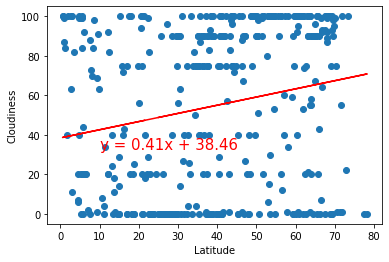

In [49]:
x_values = northern_hemp_df["Latitude"]
y_values = northern_hemp_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(10,33))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08591554139344765


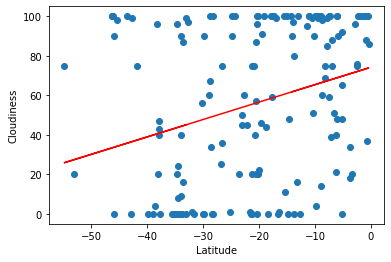

In [50]:
x_values = southern_hemp_df["Latitude"]
y_values = southern_hemp_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-65,90))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0043486629362199155


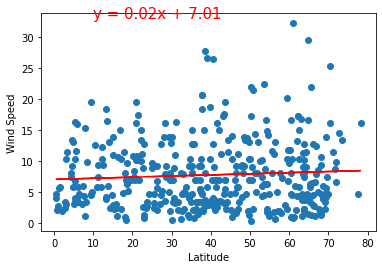

In [53]:
x_values = northern_hemp_df["Latitude"]
y_values = northern_hemp_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(10,33))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.29796099264887016


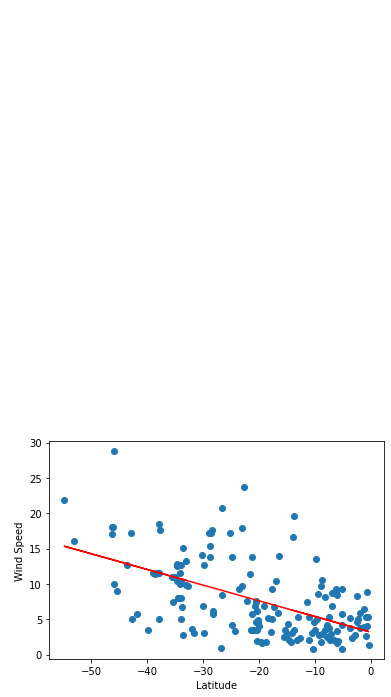

In [54]:
x_values = southern_hemp_df["Latitude"]
y_values = southern_hemp_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-65,90))